In [1]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow numpy matplotlib opencv-python --quiet

Note: you may need to restart the kernel to use updated packages.


# Diseases Detection in Plants (Case of Blackgram Plant Leaf)

### Import Libraries 

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-08-22 09:18:54.896007: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-22 09:18:56.176333: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-22 09:18:56.176495: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-22 09:18:56.583236: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-22 09:18:57.471934: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-22 09:19:01.229945: W tensorflow/compiler/tf2tensorrt/utils/py_utils.

### Loading and Preparation of the Dataset 

In [4]:
# Setting the path to our dataset
data_dir = 'BPLD_Dataset'
categories = ['Anthracnose_230', 'Healthy_220', 'Leaf_Crinckle_150', 'Powdery_Mildew_180', 'Yellow_Mosaic_220']

In [5]:
# Initialize lists to hold images and labels
images = []
labels = []

In [6]:
# Loading images and labels
for category in categories:
    path = os.path.join(data_dir, category)
    label = categories.index(category)  # Assign numerical labels
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        img_array = tf.keras.preprocessing.image.load_img(img_path, target_size=(128, 128))
        img_array = tf.keras.preprocessing.image.img_to_array(img_array)
        images.append(img_array)
        labels.append(label)

In [7]:
# Convert lists of Image and Label to numpy arrays
images = np.array(images)
labels = np.array(labels)

In [8]:
# Normalize the images
images = images / 255.0

### Split the Dataset

In [9]:
# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

###  Data Augmentation
To improve model generalization 

In [10]:
# Create an ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the generator to the training data
train_datagen.fit(X_train)

### Lets now Build the Model Usig the CNN

In [11]:
# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(categories), activation='softmax')  # Multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


### Lets Train the model 

In [12]:
# Train the model
history = model.fit(
    train_datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=100
)

Epoch 1/100


2024-08-20 17:44:49.363337: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 65028096 exceeds 10% of free system memory.
2024-08-20 17:44:49.549125: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 30482432 exceeds 10% of free system memory.
2024-08-20 17:44:50.243409: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 30482432 exceeds 10% of free system memory.
2024-08-20 17:44:50.627544: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 32514048 exceeds 10% of free system memory.
2024-08-20 17:44:50.627715: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 65028096 exceeds 10% of free system memory.


26/26 [==============================] - 34s 1s/step - loss: 1.5976 - accuracy: 0.2882 - val_loss: 1.4246 - val_accuracy: 0.3416
Epoch 2/100
26/26 [==============================] - 31s 1s/step - loss: 1.3575 - accuracy: 0.4224 - val_loss: 1.2623 - val_accuracy: 0.4059
Epoch 3/100
26/26 [==============================] - 31s 1s/step - loss: 1.2745 - accuracy: 0.4547 - val_loss: 1.1141 - val_accuracy: 0.5495
Epoch 4/100
26/26 [==============================] - 31s 1s/step - loss: 1.1838 - accuracy: 0.4944 - val_loss: 1.0318 - val_accuracy: 0.5792
Epoch 5/100
26/26 [==============================] - 32s 1s/step - loss: 1.1497 - accuracy: 0.5068 - val_loss: 1.1571 - val_accuracy: 0.5446
Epoch 6/100
26/26 [==============================] - 31s 1s/step - loss: 1.1259 - accuracy: 0.5155 - val_loss: 0.9943 - val_accuracy: 0.6188
Epoch 7/100
26/26 [==============================] - 32s 1s/step - loss: 1.0715 - accuracy: 0.5578 - val_loss: 1.0218 - val_accuracy: 0.5990
Epoch 8/100
26/26 [======

Epoch 59/100
26/26 [==============================] - 36s 1s/step - loss: 0.4240 - accuracy: 0.8460 - val_loss: 0.7878 - val_accuracy: 0.7673
Epoch 60/100
26/26 [==============================] - 35s 1s/step - loss: 0.3381 - accuracy: 0.8758 - val_loss: 0.6740 - val_accuracy: 0.7475
Epoch 61/100
26/26 [==============================] - 36s 1s/step - loss: 0.3140 - accuracy: 0.8894 - val_loss: 0.6575 - val_accuracy: 0.7772
Epoch 62/100
26/26 [==============================] - 32s 1s/step - loss: 0.3638 - accuracy: 0.8571 - val_loss: 0.6669 - val_accuracy: 0.7525
Epoch 63/100
26/26 [==============================] - 33s 1s/step - loss: 0.3514 - accuracy: 0.8807 - val_loss: 0.5921 - val_accuracy: 0.7673
Epoch 64/100
26/26 [==============================] - 34s 1s/step - loss: 0.2833 - accuracy: 0.9019 - val_loss: 0.7703 - val_accuracy: 0.7376
Epoch 65/100
26/26 [==============================] - 33s 1s/step - loss: 0.2837 - accuracy: 0.8894 - val_loss: 0.8333 - val_accuracy: 0.7327
Epoch 

### Evaluate the Model
Evaluate the model's performance:


In [13]:
# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

7/7 [==============================] - 2s 279ms/step - loss: 0.6288 - accuracy: 0.8515
Validation Accuracy: 85.15%


### Visualize Training History
Visualize the training and validation accuracy and loss over epochs

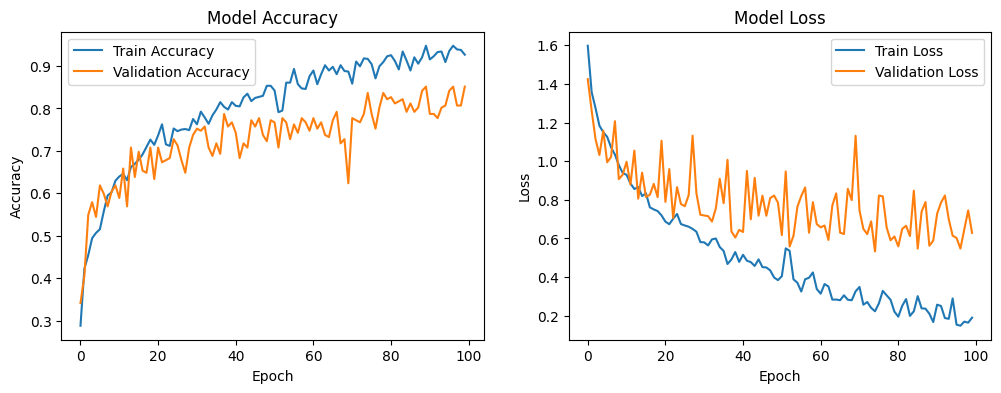

In [14]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

- Training Accuracy (Blue Line): Increases steadily over time, suggesting that the model is learning from the training data and improving its performance.
- Validation Accuracy (Orange Line): Also increases initially but fluctuates more than the training accuracy. It reaches a peak around the 70th epoch and then begins to show some instability.



### Make Predictions

In [21]:
# Load a new image for prediction
def load_and_preprocess_image(img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(128, 128))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize
    return np.expand_dims(img_array, axis=0)

# Example usage
new_image_path = 'yellowdisease.jpg'#'BPLD_Dataset/Leaf_Crinckle_150/143l.jpg'
new_image = load_and_preprocess_image(new_image_path)
prediction = model.predict(new_image)

# Interpret the prediction
predicted_class = np.argmax(prediction)
predicted_label = categories[predicted_class]
print(f"The leaf is classified as: {predicted_label}")

1/1 [==============================] - 0s 34ms/step
The leaf is classified as: Yellow_Mosaic_220
